In [1]:
import pymysql
import pymysql.cursors
import pandas as pd

In [3]:
connection = pymysql.connect(host = '192.168.1.91',
                             user = 'root',
                             password = 'mysql',
                             db = 'Retail_database',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
cursor = connection.cursor()

In [4]:
query = 'SELECT * from Time_Series_Data;'
df = pd.read_sql(query, connection)
df_temp = pd.read_sql(query, connection)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
# df.Date = df.Date.astype(date)
df_temp

,Date,GrandTotal
0,2017-01-01,15512.60
1,2017-01-02,15060.92
2,2017-01-03,30936.62
3,2017-01-04,34550.93
4,2017-01-05,14243.63
5,2017-01-06,12071.07
6,2017-01-07,11299.71
7,2017-01-08,11911.15
8,2017-01-09,13230.76
9,2017-01-10,17397.57


In [6]:
import datetime
now = datetime.datetime.now()
now = now.year
now

2019

In [7]:
df = df.loc[df['Date'].dt.year<now]

In [9]:
df2 = df_temp.loc[df_temp['Date'].dt.year==now]
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year
df2 = df2[['Month','Year','GrandTotal']]


df2 = df2.groupby(['Year', 'Month'], as_index=False).sum()


df2['Month_Year'] = df2['Month'].astype(str)+'-'+df2['Year'].astype(str)
df2 = df2.set_index(df2.Month_Year, drop=True, append=False)
df2.drop(columns=['Month_Year','Year','Month'],axis=1,inplace = True)
df2

/home/aniket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/aniket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,GrandTotal
Month_Year,
1-2019,992860.24
2-2019,1096132.05
3-2019,821225.58
4-2019,859129.89
5-2019,261740.98


In [8]:
df

,Date,GrandTotal
0,2017-01-01,15512.60
1,2017-01-02,15060.92
2,2017-01-03,30936.62
3,2017-01-04,34550.93
4,2017-01-05,14243.63
5,2017-01-06,12071.07
6,2017-01-07,11299.71
7,2017-01-08,11911.15
8,2017-01-09,13230.76
9,2017-01-10,17397.57


In [9]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [10]:
df1 = df.groupby(['Year', 'Month'], as_index=False).sum()
# df1['Month_Year'] = df1[['Month', 'Year']].apply(lambda x: '-'.join(x), axis=1)
df1['Month_Year'] = df1['Month'].astype(str)+'-'+df1['Year'].astype(str)
df1 = df1[['Month_Year','GrandTotal']]

df1 = df1.set_index(df1.Month_Year, drop=True, append=False)
df1.drop(columns=['Month_Year'],axis=1,inplace = True)
df1

,GrandTotal
Month_Year,
1-2017,645542.45
2-2017,674335.95
3-2017,803382.26
4-2017,556502.60
5-2017,794002.71
6-2017,784205.60
7-2017,1064578.49
8-2017,1148894.06
9-2017,999885.24


In [12]:
from statsmodels.tsa.arima_model import ARIMA
import pickle

model = ARIMA(df1, order=(0,1,1))
# dbfile = open('time_series_monthly_p', 'ab') 

# pickle.dump(model, dbfile)                      
# dbfile.close() 


model_fit = model.fit(disp=0)
print(model_fit.summary())



                             ARIMA Model Results                              
Dep. Variable:           D.GrandTotal   No. Observations:                   23
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -354.516
Method:                       css-mle   S.D. of innovations        1195246.273
Date:                Mon, 05 Aug 2019   AIC                            715.032
Time:                        10:35:37   BIC                            718.438
Sample:                    02-01-2017   HQIC                           715.889
                         - 12-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.705e+05      3e+05      0.568      0.576   -4.17e+05    7.58e+05
ma.L1.D.GrandTotal     0.2055      0.391      0.525      0.605      -0.561       0.972
                    

/home/aniket/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/aniket/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [27]:
ARIMA

statsmodels.tsa.arima_model.ARIMA

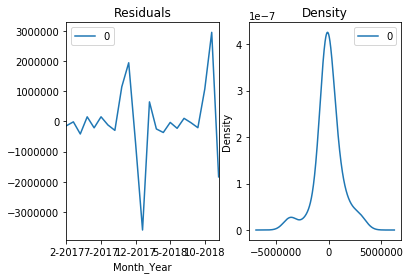

In [28]:
import matplotlib.pyplot as plt
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

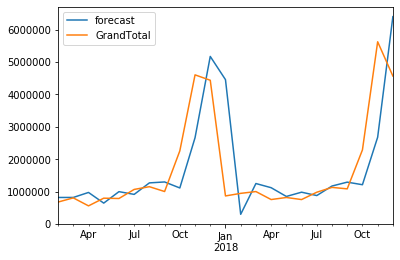

In [29]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [111]:
df1

,GrandTotal
Month_Year,
1-2017,645542.45
2-2017,674335.95
3-2017,803382.26
4-2017,556502.60
5-2017,794002.71
6-2017,784205.60
7-2017,1064578.49
8-2017,1148894.06
9-2017,999885.24


In [25]:
model_fit.predict()

2017-02-01    170534.662538
2017-03-01    143642.333300
2017-04-01    184011.609017
2017-05-01     57931.123239
2017-06-01    286837.216297
2017-07-01     17800.980282
2017-08-01    339382.050733
2017-09-01     -8398.200151
2017-10-01    239673.616906
2017-11-01    436739.345323
2017-12-01    596611.459269
2018-01-01   -333631.087649
2018-02-01   -546884.359243
2018-03-01    817286.180333
2018-04-01   -478267.846933
2018-05-01    649110.236108
2018-06-01   -319877.240818
2018-07-01    560014.673850
2018-08-01   -182786.928237
2018-09-01    501647.791001
2018-10-01   -220000.331859
2018-11-01    896742.836431
2018-12-01    554056.305383
Freq: MS, dtype: float64

In [13]:
!pip3 install pmdarima

SyntaxError: invalid syntax (<ipython-input-20-f6bbc7f259c7>, line 1)

In [21]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df1, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


/home/aniket/.local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=319.488, BIC=320.283, Fit time=0.061 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=323.478, BIC=324.672, Fit time=0.014 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=322.908, BIC=324.102, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=323.918, BIC=325.510, Fit time=0.022 seconds


/home/aniket/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [51]:
stepwise_model.fit(df1)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 0, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [52]:
future_forecast = stepwise_model.predict(n_periods=5)

In [53]:
future_forecast


array([ 986438.13545455, 1058502.44090909, 1105824.51636364,
        851580.88181818,  906859.07727273])

In [54]:
df2

,GrandTotal
Month_Year,
1-2019,992860.24
2-2019,1096132.05
3-2019,821225.58
4-2019,859129.89
5-2019,261740.98
